In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
data = pd.read_csv("Salary_Data.csv")

In [3]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


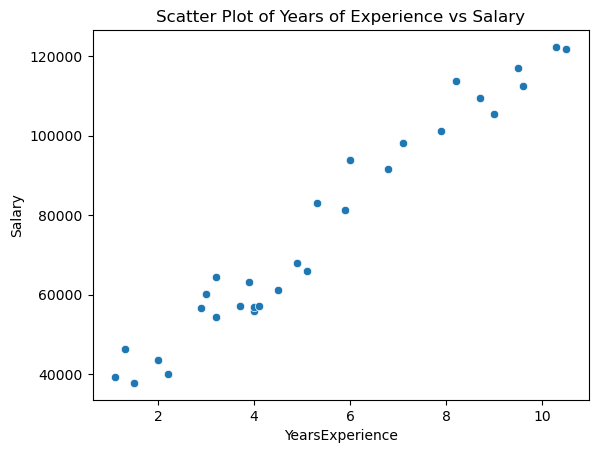

In [5]:
# Explore the data
sns.scatterplot(data=data, x="YearsExperience", y="Salary")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.title("Scatter Plot of Years of Experience vs Salary")
plt.show()

In [6]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


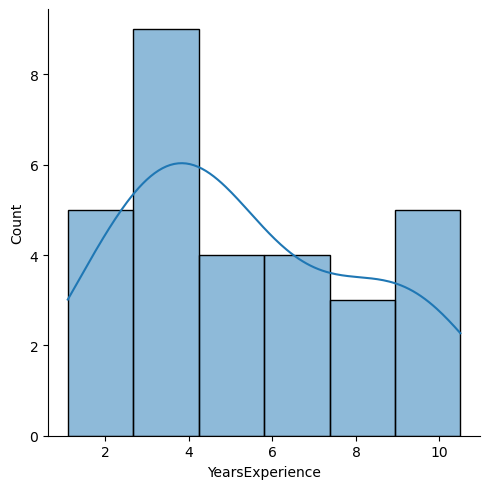

In [7]:
import seaborn as sns
sns.displot(data['YearsExperience'],kde=True)

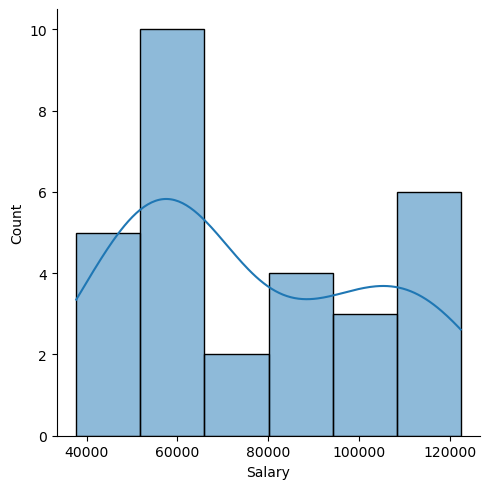

In [8]:
sns.displot(data['Salary'],kde=True)

In [9]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        11:35:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

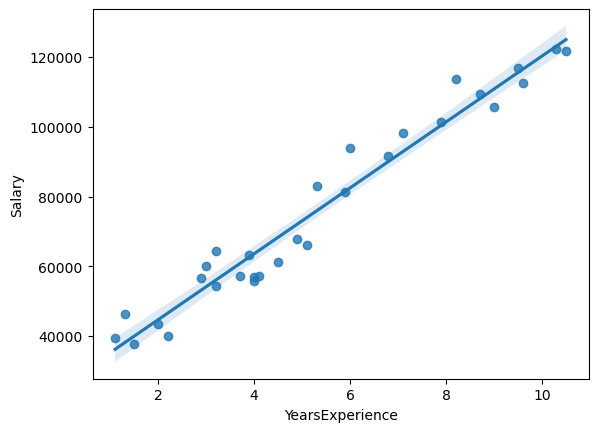

In [11]:
sns.regplot(x="YearsExperience", y="Salary", data=data);

In [12]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [13]:
# 7 years experience
(7*9449.962321+25792.200199)

91941.936446

In [14]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [15]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [16]:
newdata=pd.Series([11,17])

In [17]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [18]:
model.predict(data_pred)

0    129741.785735
1    186441.559663
dtype: float64

##Log Transformation

In [19]:
data['log_YearsExperience'] = np.log(data['YearsExperience'])
data['log_Salary'] = np.log(data['Salary'])
data

,YearsExperience,Salary,log_YearsExperience,log_Salary
0,1.1,39343.0,0.095310,10.580073
1,1.3,46205.0,0.262364,10.740843
2,1.5,37731.0,0.405465,10.538237
3,2.0,43525.0,0.693147,10.681091
4,2.2,39891.0,0.788457,10.593906
5,2.9,56642.0,1.064711,10.944506
6,3.0,60150.0,1.098612,11.004597
7,3.2,54445.0,1.163151,10.904946
8,3.2,64445.0,1.163151,11.073567
9,3.7,57189.0,1.308333,10.954117


C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


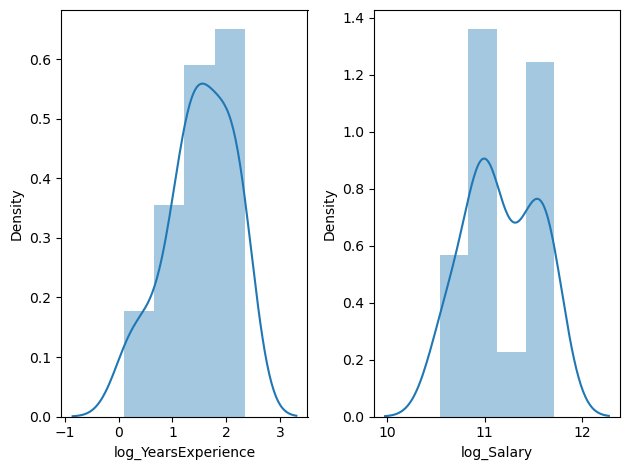

In [21]:
plt.subplot(1,2,1)
sns.distplot(data['log_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(data['log_Salary'])

plt.tight_layout()

## Sqrt transformation

In [22]:
data['sqrt_YearsExperience'] = np.sqrt(data['YearsExperience'])
data['sqrt_Salary'] = np.sqrt(data["Salary"])
data

,YearsExperience,Salary,log_YearsExperience,log_Salary,sqrt_YearsExperience,sqrt_Salary
0,1.1,39343.0,0.095310,10.580073,1.048809,198.350700
1,1.3,46205.0,0.262364,10.740843,1.140175,214.953483
2,1.5,37731.0,0.405465,10.538237,1.224745,194.244691
3,2.0,43525.0,0.693147,10.681091,1.414214,208.626460
4,2.2,39891.0,0.788457,10.593906,1.483240,199.727314
5,2.9,56642.0,1.064711,10.944506,1.702939,237.995798
6,3.0,60150.0,1.098612,11.004597,1.732051,245.254969
7,3.2,54445.0,1.163151,10.904946,1.788854,233.334524
8,3.2,64445.0,1.163151,11.073567,1.788854,253.860198
9,3.7,57189.0,1.308333,10.954117,1.923538,239.142217


C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Basud\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


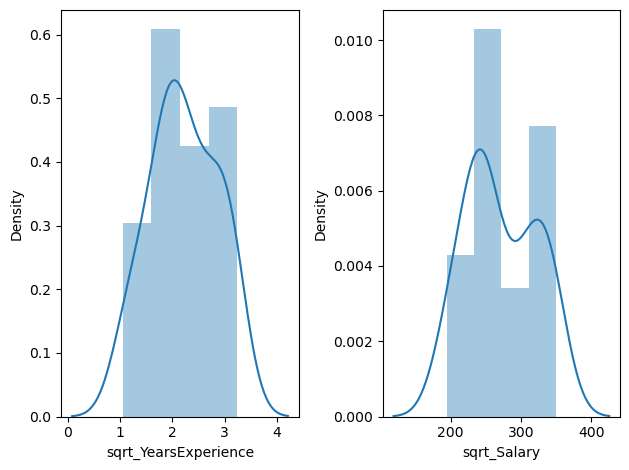

In [24]:
plt.subplot(1,2,1)
sns.distplot(data['sqrt_YearsExperience'])

plt.subplot(1,2,2)
sns.distplot(data['sqrt_Salary'])

plt.tight_layout()

In [25]:
data['sqrt_YearsExperience'].skew()

-0.04919608394250605

In [26]:
data['sqrt_Salary'].skew()

0.16904336802767353